In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# 線形と非線形の詳しい解説
# https://math-fun.net/20190619/1715/#i-2
# 線形性の解説
# https://qiita.com/te20/items/e91faee8f9eb9b1a869c#%E7%B7%9A%E5%BD%A2%E6%80%A7%E3%81%AE%E4%BE%8B

In [9]:
# データを読みこむ
UN = np.array(pd.read_csv('data/UN.csv').values[:, 1:3]).astype('float64')
UN.shape

(207, 2)

In [10]:
# ~a   # ビット反転
# Nanを含むデータを除く
UN = UN[~np.isnan(UN).any(axis = 1), :]
UN.shape

(193, 2)

In [27]:
# ログを取ると回帰しやすい形になるね！
logUN = np.log(UN) # データを対数で変換
# reshape(-1, 1)のように-1をしてやれば、軸(axis)を増やせる
# numpyのreshapeの-1は渡してあげたところの軸を推定してreshapeしてくれる便利関数
x = logUN[:, 1].reshape(-1, 1); y = logUN[:, 0]
print("Xのshape: {}\nYのshape: {}".format(x.shape, y.shape))

Xのshape: (193, 1)
Yのshape: (193,)


In [28]:
# sm.add_constant関数を用いれば、任意の行列に定数項に対応する列を列の0番目に追加してくれる
xc = sm.add_constant(x)
xc.shape

(193, 2)

In [31]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [32]:
lf = sm.OLS(y, xc).fit()
lf.params

array([ 7.0452008 , -0.49320262])

In [33]:
lf.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.654   
Dependent Variable: y                AIC:                348.5429
Date:               2021-05-12 19:37 BIC:                355.0683
No. Observations:   193              Log-Likelihood:     -172.27 
Df Model:           1                F-statistic:        363.7   
Df Residuals:       191              Prob (F-statistic): 4.32e-46
R-squared:          0.656            Scale:              0.35266 
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     7.0452     0.1991    35.3790   0.0000    6.6524    7.4380
x1       -0.4932     0.0259   -19.0697   0.0000   -0.5442   -0.4422
-----------------------------------------------------------------
Omnibus:              10.055       Durbin-Watson:          1.864 
Prob(Omnibus):        0.007        Jarque-Bera (JB):       21.166
Skew:                 0.097        Prob(JB):               0.000 
Kurtosis:             4.611        Condition No.:          36    
=================================================================

"""

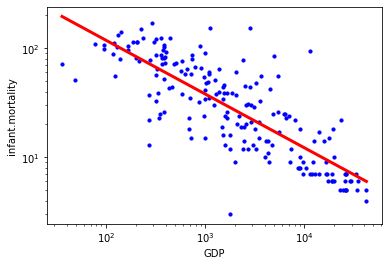

In [36]:
tx = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) # 予測点の生成
txc = sm.add_constant(tx)
py = lf.predict(txc)
plt.xlabel('GDP');plt.ylabel('infant.mortality')
# これ初めて(これを事前に指定してやれば、データをlogスケールにしなくてもlogスケールの図を作れる！！！)
plt.xscale("log");plt.yscale("log")
plt.scatter(UN[:, 1], UN[:, 0], s= 10, c = 'blue')
plt.plot(np.exp(tx), np.exp(py), 'r-', lw = 3)
plt.show();

In [38]:
# Davisの体重と身長のデータを読み込む
dat = np.array(pd.read_csv('data/Davis.csv').values[:, 1:3].astype('float64'))

In [39]:
dat = dat[~np.isnan(dat).any(axis = 1), :] # nanを含むデータを除く

In [48]:
x = dat[:, 0].reshape(-1, 1)
y = dat[:, 1]
xc = sm.add_constant(x)
lf = sm.OLS(y, xc).fit()

In [49]:
lf.params # 回帰係数の推定値 : (定数項, 傾き)

array([1.60093116e+02, 1.50864502e-01])

In [50]:
c = np.linspace(20, 150, 1000)
k = lf.params[0] + lf.params[1] * c

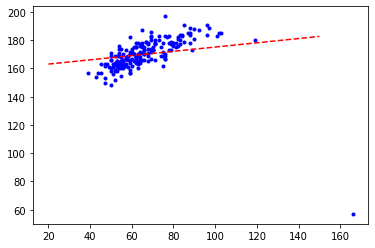

In [51]:
plt.scatter(dat[:, 0], dat[:, 1], marker = '.', color = 'blue')
plt.plot(c, k, 'r--')

In [53]:
# 外れ値を除いたデータに最小２乗法を利用
lfr = sm.OLS(np.delete(y, 11, 0), np.delete(xc, 11, 0)).fit()
lfr.params

array([136.83660744,   0.51689358])

In [54]:
help(np.delete)

Help on function delete in module numpy:

delete(arr, obj, axis=None)
    Return a new array with sub-arrays along an axis deleted. For a one
    dimensional array, this returns those entries not returned by
    `arr[obj]`.
    
    Parameters
    ----------
    arr : array_like
        Input array.
    obj : slice, int or array of ints
        Indicate indices of sub-arrays to remove along the specified axis.
    
        .. versionchanged:: 1.19.0
            Boolean indices are now treated as a mask of elements to remove,
            rather than being cast to the integers 0 and 1.
    
    axis : int, optional
        The axis along which to delete the subarray defined by `obj`.
        If `axis` is None, `obj` is applied to the flattened array.
    
    Returns
    -------
    out : ndarray
        A copy of `arr` with the elements specified by `obj` removed. Note
        that `delete` does not occur in-place. If `axis` is None, `out` is
        a flattened array.
    
    See Also

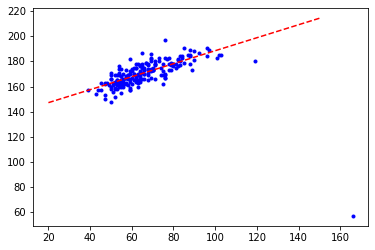

In [55]:
c = np.linspace(20, 150, 100)
k = lfr.params[0] + lfr.params[1] * c
plt.scatter(dat[:, 0], dat[:, 1], marker = '.', color = 'blue')
plt.plot(c, k, 'r--')

In [56]:
rf = sm.RLM(y, xc).fit() # フーバー損失によるロバスト推定

In [57]:
rf.params

array([137.81427721,   0.50076743])

In [58]:
# 推定されたスケール(標準偏差)
rf.scale

5.717634656169283

In [59]:
rf.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Robust linear model
=========================================================
Model:              RLM              Df Residuals: 198   
Dependent Variable: y                Norm:         HuberT
Date:               2021-05-13 13:33 Scale Est.:   mad   
No. Observations:   200              Cov. Type:    H1    
Df Model:           1                Scale:        5.7176
---------------------------------------------------------
        Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
---------------------------------------------------------
const  137.8143   1.7453 78.9642 0.0000 134.3936 141.2350
x1       0.5008   0.0259 19.3678 0.0000   0.4501   0.5514
=========================================================

"""

In [60]:
# 予測点の生成
tx = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
txc = sm.add_constant(tx)

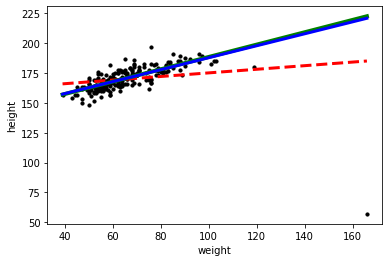

In [62]:
# プロット
plt.xlabel('weight');plt.ylabel('height')
plt.scatter(x, y,s = 10, c='black')
plt.plot(tx, lf.predict(txc), 'r--', lw = 3)
plt.plot(tx, lfr.predict(txc), 'g-', lw = 4)
plt.plot(tx, rf.predict(txc), 'b-', lw = 3)
plt.show()

In [63]:
# ハンペル損失
rfh = sm.RLM(y, xc, M = sm.robust.norms.Hampel()).fit()
rfh.params

array([136.24027068,   0.52543712])

In [64]:
rfh.scale

5.420989982024714

In [65]:
# トゥーキーの二乗平方重み損失
rfb = sm.RLM(y, xc, M = sm.robust.norms.TukeyBiweight()).fit()
rfb.params

array([135.63061588,   0.53426083])

In [66]:
rfb.scale

5.453397062997567

In [67]:
# リッジ回帰
n = 100 # データ数
degree = 8 # 多項式モデルの次数
pardim = degree + 1


In [68]:
# データ作成
x = np.random.uniform(-2, 2, n)
y = np.sin(2 * np.pi * x) / x + np.random.normal(scale=0.5, size = n)

In [69]:
mxc = np.power.outer(x, np.arange(pardim)) # データ行列
mxc.shape

(100, 9)

In [73]:
IE = np.identity(mxc.shape[1]); IE[0, 0] = 0 # 行列 I(単位行列) - E_11(1, 1)が1の行列

In [74]:
# 回帰係数の推定値
np.linalg.solve(np.dot(mxc.T, mxc) + 1*IE, np.dot(mxc.T, y))

array([ 2.7579153 , -0.49494445, -5.19102601,  0.88833406,  2.96446878,
       -0.45482068, -0.58310441,  0.07222451,  0.02176697])

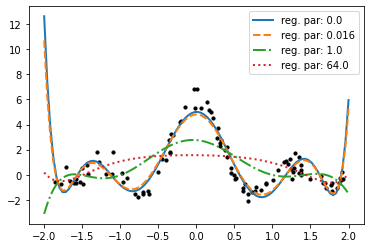

In [76]:
plt.scatter(x, y, c = 'black', s = 10)
tx = np.linspace(-2, 2, 100)
tpx = np.power.outer(tx, np.arange(pardim))
a = np.array([0, 2 ** (-6), 1, 2 ** 6])  # 正則化パラメータの候補
ls = ['-', '--', '-.', ':']
for i in np.arange(a.size):
    theta = np.linalg.solve(np.dot(mxc.T, mxc) + a[i] * IE, np.dot(mxc.T, y))
    py = np.dot(tpx, theta) # 予測値
    #     プロット
    plt.plot(tx, py, label='reg. par: '+str(round(a[i], 3)),
            ls = ls[i], lw = 2)
plt.legend()
plt.show();

In [77]:
# データ生成の設定
n = 100; degree = 8; pardim = degree + 1

In [88]:
x = np.random.uniform(-2, 2, n)
y = np.sin(2 * np.pi * x) / x + np.random.normal(scale = 0.5, size = n)

In [89]:
# データ行列
# 配列a, b全ての要素の組み合わせに対して、関数を適用する(外積のnp.outerとは違う？？)
mx = np.power.outer(x, np.arange(pardim))
# 正則化パラメータの設定: 定数高は正則化項に含めない
alpha = 0.01; rp = np.r_[0, np.repeat(alpha/n, degree)]
rp

array([0.    , 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001])

In [90]:
# リッジ回帰 L1_wt = 0とする必要がある
ri = sm.OLS(y, mx).fit_regularized(alpha=rp, L1_wt = 0)

In [91]:
# 推定された回帰係数
ri.params

array([  4.76337458,   0.06495415, -18.08108104,  -0.05214974,
        18.85896073,  -0.08035683,  -7.22269072,   0.03118408,
         0.90870174])

In [92]:
np.linalg.solve(np.dot(mx.T, mx) + alpha * IE, np.dot(mx.T, y))

array([  4.76337458,   0.06495415, -18.08108104,  -0.05214974,
        18.85896073,  -0.08035683,  -7.22269072,   0.03118408,
         0.90870174])

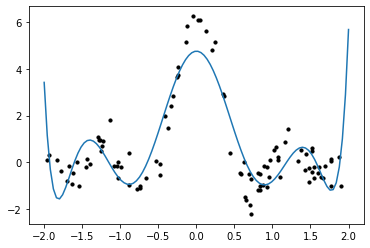

In [95]:
tx = np.linspace(-2, 2, 100) # 予測点
txc = np.power.outer(tx, np.arange(pardim))
py = ri.predict(txc) # 推定値
plt.scatter(x, y, c = 'black', s = 10)
plt.plot(tx, py)
plt.show();

In [96]:
# カーネル回帰分析
# 基底関数の代わりにカーネル関数を用いて統計モデルを表現することで、次元Dが非常に大きくても、効率的に計算することができる

In [97]:
from sklearn.kernel_ridge import KernelRidge
?KernelRidge

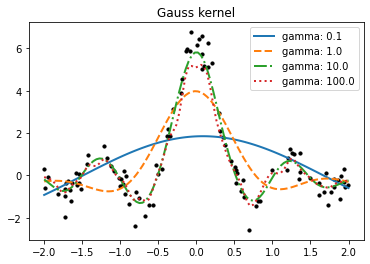

In [98]:
# ガウスカーネルを用いた例
# データ生成
n = 100
x = np.random.uniform(-2, 2, n); X = x.reshape(-1, 1)
y = np.sin(2 * np.pi*x) / x + np.random.normal(scale = 0.5, size = n)
tx = np.linspace(-2, 2, 100) # テスト点
g = np.array([0.1,1, 10, 100]) # gammaの候補
l = ['-', '--', '-.', ':'] # プロットのラインスタイル
plt.title('Gauss kernel')
plt.scatter(x, y, c = 'black', s = 10)
for i in np.arange(len(g)):
    kr = KernelRidge(alpha = 1, kernel='rbf', gamma=g[i])
    kr.fit(X, y) #　データへの当てはめ
    py = kr.predict(tx.reshape(-1, 1)) # 予測値の計算
    plt.plot(tx, py, label='gamma: ' + str(round(g[i], 3)), ls = l[i], lw = 2)
plt.legend()
plt.show();
    

/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


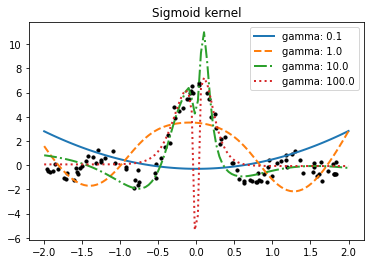

In [99]:
# シグモイドカーネルを用いた例
# データ生成
n = 100
x = np.random.uniform(-2, 2, n); X = x.reshape(-1, 1)
y = np.sin(2 * np.pi*x) / x + np.random.normal(scale = 0.5, size = n)
tx = np.linspace(-2, 2, 100) # テスト点
g = np.array([0.1,1, 10, 100]) # gammaの候補
l = ['-', '--', '-.', ':'] # プロットのラインスタイル
plt.title('Sigmoid kernel')
plt.scatter(x, y, c = 'black', s = 10)
for i in np.arange(len(g)):
    kr = KernelRidge(alpha = 1, kernel='sigmoid', gamma=g[i])
    kr.fit(X, y) #　データへの当てはめ
    py = kr.predict(tx.reshape(-1, 1)) # 予測値の計算
    plt.plot(tx, py, label='gamma: ' + str(round(g[i], 3)), ls = l[i], lw = 2)
plt.legend()
plt.show();


In [101]:
51/(5270.514 * 0.5408) * 630582

11282.93513755021